In [1]:
    
from library.Accessor import Accessor
from library.attributionUtils import get_attributes,adversarial_detection_set
from library.attributions import multiply_attributed_with_input,number_of_active_nodes
import torch
import numpy as np

c:\Users\ata\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:


begning_accessor = Accessor('./begnign/mnist/mnist_1')
adversarial_accessor= Accessor('./adversarial/mnist/FGSM/mnist_1')
ground_truth_accessor = Accessor('./Ground_truth/mnist/mnist_1')
expected_nb_nodes = 420

begning_sample_act = begning_accessor.get_all()
adv_sample_act = adversarial_accessor.get_all()
gt_sample_act = ground_truth_accessor.get_all()



# Transforms the activations to the folowing data set : x[activationA,activaitonB,...]  y= [1, 0 ,1...]
X_adv,Y_adv=adversarial_detection_set(adv_sample_act,label = torch.tensor(1),expected_nb_nodes=expected_nb_nodes)
X_ben,Y_ben=adversarial_detection_set(begning_sample_act,label = torch.tensor(0),expected_nb_nodes =expected_nb_nodes)
X_gt ,Y_gt =adversarial_detection_set(gt_sample_act,label = torch.tensor(0),expected_nb_nodes=expected_nb_nodes)


Loaded all activations for ./begnign/mnist/mnist_1
Loaded all activations for ./adversarial/mnist/FGSM/mnist_1
Loaded all activations for ./Ground_truth/mnist/mnist_1
[GRAPH LEARN] [SET GENERATION] Ignored 0 Samples
[GRAPH LEARN] [SET GENERATION] Ignored 1 Samples
[GRAPH LEARN] [SET GENERATION] Ignored 1 Samples


c:\Users\ata\Desktop\Research\fall 2022\ProvML\library\attributionUtils.py:286: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y.append(torch.tensor(label))


Average Weight Adv :24.82384668521948 Ben : 1151.315798077917 Gt : 1324.9332079272986 


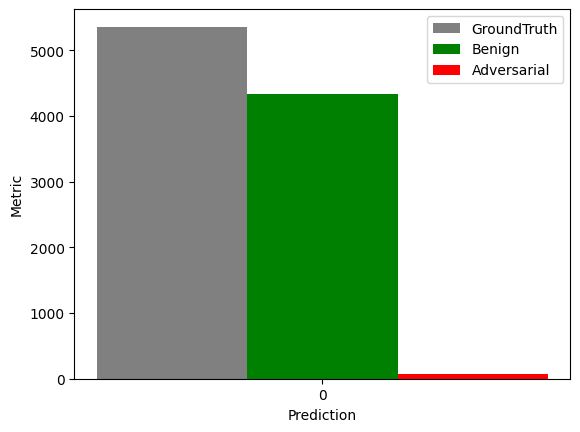

In [3]:
model = torch.load('./advDetectionModels/test.pt')

adv_attr =multiply_attributed_with_input(X_adv,Y_adv,model)
ben_attr =multiply_attributed_with_input(X_ben,Y_ben,model)
gt_attr =multiply_attributed_with_input(X_gt,Y_gt,model)

avg_adv = [np.average(i) for i in adv_attr]
ben_attr = [np.average(i) for i in ben_attr]
gt_attr = [np.average(i) for i in gt_attr]

print(f'Average Weight Adv :{np.average(avg_adv)} Ben : {np.average(ben_attr)} Gt : {np.average(gt_attr)} ')


from library.utils import plotAcrossPredictions

plotAcrossPredictions(gt_attr,ben_attr,avg_adv,1)


Average ben : 106.80184936523438  adv 143.30282592773438
Range [ 7.703423500061035 :249.2240447998047]   adv 7.703423500061035 :337.2135925292969 
Average ben : 69.40817260742188  adv 151.32791137695312
Range [ 1.3480643033981323 :262.3815002441406]   adv 12.178598403930664 :327.6019287109375 
Average ben : 670.8019409179688  adv 810.5021362304688
Range [ 8.455211639404297 :2287.232666015625]   adv 8.455211639404297 :1712.644775390625 
Average ben : 147.64414978027344  adv 295.9140319824219
Range [ 46.172584533691406 :367.85699462890625]   adv 21.268882751464844 :635.836181640625 
Average ben : 69.40817260742188  adv 151.32791137695312
Range [ 1.3480643033981323 :262.3815002441406]   adv 12.178598403930664 :327.6019287109375 
Average ben : 634.0912475585938  adv 456.4097595214844
Range [ 56.542198181152344 :1932.6885986328125]   adv 25.780351638793945 :1007.2450561523438 
Average ben : 178.6522674560547  adv 136.73304748535156
Range [ 70.0028076171875 :334.2107238769531]   adv 10.21642

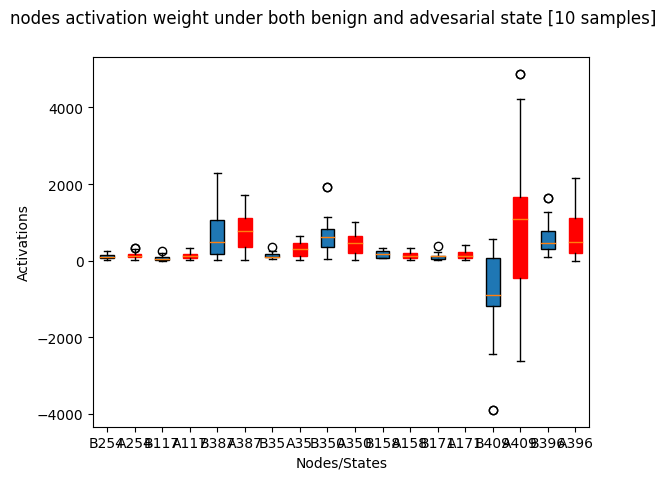

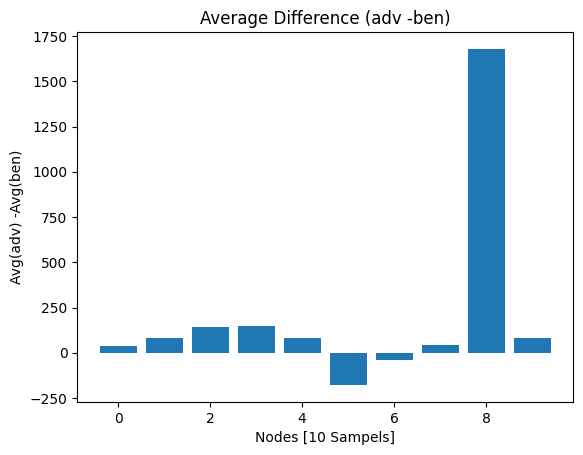

In [4]:
from library.attributionUtils import get_nodes_weight_per_label,box_plot
from keras.utils import to_categorical
X = X_ben + X_adv
Y = Y_ben+ Y_adv
Y = to_categorical(Y)
#Positive and negatie to begnign decision
ben ,adv = get_nodes_weight_per_label(0,expected_nb_nodes,X,Y,model)

#Positive and negative to adversaraial decision 
adv_ ,ben_ = get_nodes_weight_per_label(1,expected_nb_nodes,X,Y,model)

box_plot(ben,ben_,adv,adv_,expected_nb_nodes)


ValueError: x and y must be the same size

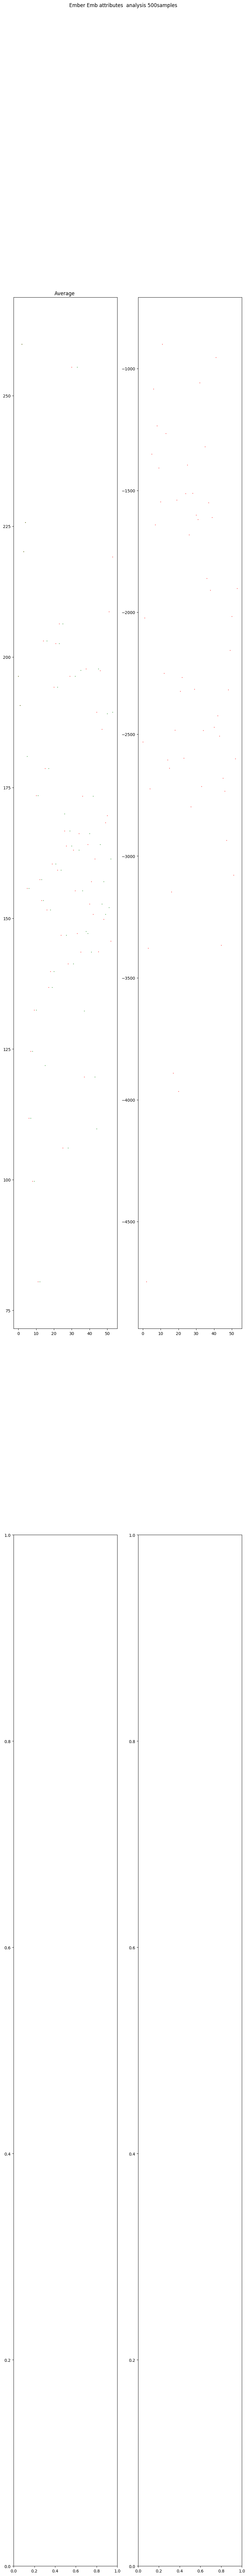

In [5]:
from library.attributionUtils import scatter
attributes = get_attributes(input,model,prediction)           
